In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

pd.set_option("display.max_columns", None)
pd.set_option("display.width", 1000)

In [2]:
!pip install gdown

In [3]:
import gdown
import os

folder_id = "1Ot4IiQL8DSQozgVwuP9jY9Y1wPzgvn8K"
output_dir = "dataset_finsight"

os.makedirs(output_dir, exist_ok=True)

gdown.download_folder(
    id=folder_id,
    output=output_dir,
    quiet=False,
    use_cookies=False
)

Retrieving folder contents


Processing file 1AfVHd2QUi8tkfpZ_Av8JkqQCiq90Nrtr products_master.csv
Processing file 19ziethlpkocnnB-1Ftud7yInM4cIiiF- receipt_raw.jsonl
Processing file 1t1XaVVkH8IpIDUSCbgfF4z8fZ0Ef6gZN transaction_items_100k.csv
Processing file 1BVljJslHYSnojaOZZqLt2uKe0t4Nxoll transactions_100k.csv


Retrieving folder contents completed
Building directory structure
Building directory structure completed
Downloading...
From: https://drive.google.com/uc?id=1AfVHd2QUi8tkfpZ_Av8JkqQCiq90Nrtr
To: /content/dataset_finsight/products_master.csv
100%|██████████| 120k/120k [00:00<00:00, 35.8MB/s]
Downloading...
From: https://drive.google.com/uc?id=19ziethlpkocnnB-1Ftud7yInM4cIiiF-
To: /content/dataset_finsight/receipt_raw.jsonl
100%|██████████| 34.6M/34.6M [00:01<00:00, 31.3MB/s]
Downloading...
From: https://drive.google.com/uc?id=1t1XaVVkH8IpIDUSCbgfF4z8fZ0Ef6gZN
To: /content/dataset_finsight/transaction_items_100k.csv
100%|██████████| 19.7M/19.7M [00:00<00:00, 113MB/s] 
Downloading...
From: https://drive.google.com/uc?id=1BVljJslHYSnojaOZZqLt2uKe0t4Nxoll
To: /content/dataset_finsight/transactions_100k.csv
100%|██████████| 11.8M/11.8M [00:00<00:00, 31.5MB/s]
Download completed


['dataset_finsight/products_master.csv',
 'dataset_finsight/receipt_raw.jsonl',
 'dataset_finsight/transaction_items_100k.csv',
 'dataset_finsight/transactions_100k.csv']

In [4]:
products_df = pd.read_csv("dataset_finsight/products_master.csv")
items_df = pd.read_csv("dataset_finsight/transaction_items_100k.csv")
transactions_df = pd.read_csv("dataset_finsight/transactions_100k.csv")
receipts_df = pd.read_json(
    "dataset_finsight/receipt_raw.jsonl",
    lines=True
)

In [7]:
print("Products:", products_df.shape)
print("Transaction Items:", items_df.shape)
print("Transactions:", transactions_df.shape)
print("Receipts:", receipts_df.shape)

Products: (1300, 9)
Transaction Items: (249790, 9)
Transactions: (100000, 16)
Receipts: (100000, 6)


In [8]:
transactions_df.head()

,transaction_id,persona_id,date,amount,merchant,category,payment_method,bank,tx_type,description,balance_after,source,error_flag,parse_status,receipt_confidence,item_count
0,TX30000001,P001,2020-03-17 18:10:30,454254.0,Shopee,Shopping,QRIS,NaN,debit,Belanja,11636789.0,synthetic,False,ok,0.68,4
1,TX30000002,P001,2020-03-17 18:20:30,227185.0,Shopee,Shopping,Debit,BCA,debit,Belanja,11409604.0,synthetic,False,ok,0.69,3
2,TX30000003,P001,2020-03-17 18:34:30,421688.0,Lazada,Shopping,QRIS,NaN,debit,Belanja,10987916.0,synthetic,False,ok,0.79,4
3,TX30000004,P001,2020-03-17 19:01:30,75045.0,Alfamart,Shopping,Debit,BCA,debit,Belanja,10912871.0,synthetic,False,ok,0.71,3
4,TX30000005,P001,2020-03-18 08:04:25,344064.0,Lazada,Shopping,Kredit,BNI,debit,Belanja,10568807.0,synthetic,False,ok,0.63,3


In [9]:
transactions_df["persona_id"].nunique()

100

In [10]:
transactions_df["date"] = pd.to_datetime(transactions_df["date"])

In [11]:
transactions_df.isna().sum()

,0
transaction_id,0
persona_id,0
date,0
amount,0
merchant,0
category,0
payment_method,0
bank,40188
tx_type,0
description,0


In [12]:
items_df["transaction_id"].nunique() == transactions_df["transaction_id"].nunique()

True

In [13]:
items_df["product_id"].isin(products_df["product_id"]).all()

np.True_

In [14]:
transactions_df[["amount", "item_count", "receipt_confidence"]].describe()

,amount,item_count,receipt_confidence
count,1.000000e+05,100000.000000,100000.000000
mean,2.258541e+05,2.497900,0.794444
std,1.896639e+05,1.396787,0.112477
min,3.025000e+03,1.000000,0.600000
25%,7.035100e+04,1.000000,0.700000
50%,1.990000e+05,2.000000,0.790000
75%,3.434032e+05,3.000000,0.890000
max,2.043335e+06,6.000000,0.990000


In [15]:
transactions_df["category"].value_counts(normalize=True) * 100

,proportion
category,
Shopping,72.043
Bills,16.041
Service,11.916


In [16]:
transactions_df["merchant"].value_counts().head(10)

,count
merchant,
Lazada,14057
Tokopedia,14031
TikTok Shop,13925
Shopee,13907
Spotify,4104
Transfer Masuk,4092
Alfamart,4049
Hypermart,4023
Netflix,3995


In [17]:
transactions_df["hour"] = transactions_df["date"].dt.hour
transactions_df["day"] = transactions_df["date"].dt.day_name()
transactions_df["month"] = transactions_df["date"].dt.month

In [18]:
transactions_df["hour"].value_counts().sort_index()

,count
hour,
6,4499
7,6740
8,6625
9,6552
10,6628
11,6656
12,6737
13,6447
14,6694


In [19]:
persona_summary = transactions_df.groupby("persona_id").agg(
    total_spent=("amount", "sum"),
    avg_spent=("amount", "mean"),
    total_tx=("transaction_id", "count"),
    avg_items=("item_count", "mean")
)

persona_summary.head()

,total_spent,avg_spent,total_tx,avg_items
persona_id,,,,
P001,217312949.0,220622.283249,985,2.255838
P002,323774355.0,250987.872093,1290,2.463566
P003,157340762.0,152758.021359,1030,2.762136
P004,186007762.0,248010.349333,750,2.450667
P005,209212057.0,234542.664798,892,2.683857


<Axes: ylabel='Frequency'>

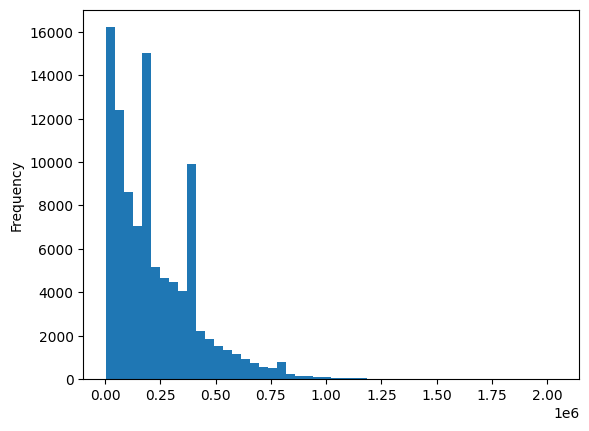

In [20]:
transactions_df["amount"].plot(kind="hist", bins=50)

In [21]:
persona_summary.corr()

,total_spent,avg_spent,total_tx,avg_items
total_spent,1.000000,0.709358,0.749529,0.379644
avg_spent,0.709358,1.000000,0.091793,0.510422
total_tx,0.749529,0.091793,1.000000,0.070987
avg_items,0.379644,0.510422,0.070987,1.000000


In [22]:
df = transactions_df.copy()

In [23]:
persona_features = df.groupby("persona_id").agg(
    total_spent=("amount", "sum"),
    avg_spent=("amount", "mean"),
    tx_count=("transaction_id", "count"),
    avg_items=("item_count", "mean"),
)

In [24]:
category_ratio = (
    df.pivot_table(
        index="persona_id",
        columns="category",
        values="transaction_id",
        aggfunc="count",
        fill_value=0
    )
)

category_ratio = category_ratio.div(category_ratio.sum(axis=1), axis=0)

category_ratio.columns = [
    col.lower() + "_ratio" for col in category_ratio.columns
]

In [25]:
df["hour"] = df["date"].dt.hour

evening_ratio = (
    df.assign(is_evening=df["hour"].between(18, 23))
      .groupby("persona_id")["is_evening"]
      .mean()
      .to_frame("evening_ratio")
)

In [27]:
merchant_diversity = (
    df.groupby("persona_id")["merchant"]
    .nunique()
    .to_frame("unique_merchants")
)

In [28]:
persona_features = (
    persona_features
    .join(category_ratio)
    .join(merchant_diversity)
    .join(evening_ratio)
)

persona_features.head()

,total_spent,avg_spent,tx_count,avg_items,bills_ratio,service_ratio,shopping_ratio,unique_merchants,evening_ratio
persona_id,,,,,,,,,
P001,217312949.0,220622.283249,985,2.255838,0.201015,0.163452,0.635533,15,0.209137
P002,323774355.0,250987.872093,1290,2.463566,0.178295,0.121705,0.700000,15,0.210853
P003,157340762.0,152758.021359,1030,2.762136,0.105825,0.086408,0.807767,15,0.222330
P004,186007762.0,248010.349333,750,2.450667,0.186667,0.122667,0.690667,15,0.192000
P005,209212057.0,234542.664798,892,2.683857,0.128924,0.100897,0.770179,15,0.207399


In [29]:
print(type(category_ratio))
print(type(merchant_diversity))
print(type(evening_ratio))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [30]:
persona_features.shape

(100, 9)

In [31]:
persona_features.isna().sum()

,0
total_spent,0
avg_spent,0
tx_count,0
avg_items,0
bills_ratio,0
service_ratio,0
shopping_ratio,0
unique_merchants,0
evening_ratio,0


In [32]:
persona_features = persona_features.drop(columns=["unique_merchants"])

In [33]:
persona_features.shape

(100, 8)

In [34]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(persona_features)

In [35]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

In [36]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

In [37]:
pca.explained_variance_ratio_.sum()

np.float64(0.7633528491788192)

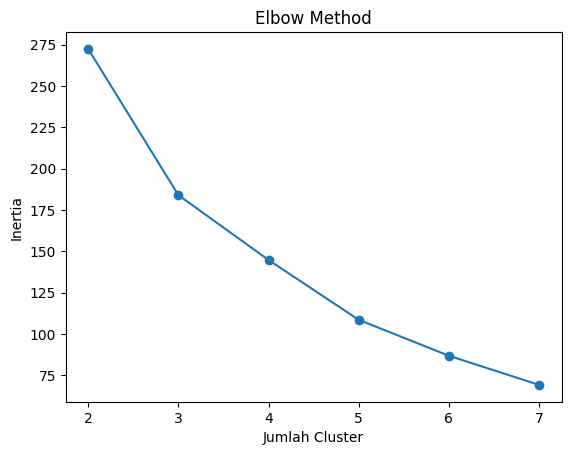

In [38]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []

K = range(2, 8)
for k in K:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(X_pca)
    inertia.append(km.inertia_)

plt.plot(K, inertia, marker="o")
plt.xlabel("Jumlah Cluster")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()

In [39]:
from sklearn.metrics import silhouette_score

for k in range(2, 8):
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = km.fit_predict(X_pca)
    score = silhouette_score(X_pca, labels)
    print(f"k={k}, silhouette={score:.3f}")

k=2, silhouette=0.505
k=3, silhouette=0.408
k=4, silhouette=0.424
k=5, silhouette=0.417
k=6, silhouette=0.397
k=7, silhouette=0.420


In [40]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(X_pca)

persona_features["cluster"] = cluster_labels

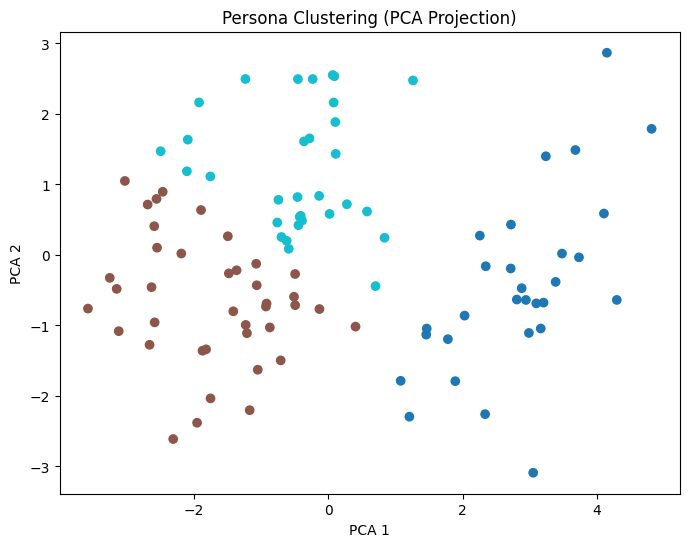

In [41]:
plt.figure(figsize=(8,6))
plt.scatter(
    X_pca[:, 0],
    X_pca[:, 1],
    c=cluster_labels,
    cmap="tab10"
)
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("Persona Clustering (PCA Projection)")
plt.show()

In [43]:
cluster_profile = (
    persona_features
    .groupby("cluster")
    .mean()
    .round(2)
)

cluster_profile

,total_spent,avg_spent,tx_count,avg_items,bills_ratio,service_ratio,shopping_ratio,evening_ratio
cluster,,,,,,,,
0,2.627011e+08,257765.85,1020.34,2.75,0.11,0.08,0.80,0.22
1,1.602310e+08,194371.81,840.51,2.37,0.18,0.14,0.68,0.22
2,2.724396e+08,231935.46,1175.94,2.42,0.17,0.13,0.69,0.22


**Hasil Interpretasi:**

Hasil clustering menghasilkan tiga persona pengguna yang memiliki karakteristik finansial yang berbeda secara signifikan. Cluster pertama merepresentasikan pengguna dengan perilaku konsumtif dan dominasi pengeluaran belanja, cluster kedua menunjukkan pengguna yang lebih terkontrol dan berorientasi pada kewajiban finansial, sementara cluster ketiga merepresentasikan pengguna dengan aktivitas transaksi tinggi namun tetap menjaga keseimbangan pengeluaran.

# Mencoba model lain yaitu: Agglomerative Hierarchical Clustering

In [44]:
from sklearn.cluster import AgglomerativeClustering

In [45]:
agg = AgglomerativeClustering(n_clusters=3, linkage="ward")
persona_features["cluster_hier"] = agg.fit_predict(X_scaled)

In [46]:
hier_profile = (
    persona_features
    .groupby("cluster_hier")
    .mean()
    .round(2)
)

hier_profile

,total_spent,avg_spent,tx_count,avg_items,bills_ratio,service_ratio,shopping_ratio,evening_ratio,cluster
cluster_hier,,,,,,,,,
0,1.700897e+08,186289.50,918.68,2.34,0.19,0.14,0.67,0.22,1.16
1,2.627011e+08,257765.85,1020.34,2.75,0.11,0.08,0.80,0.22,0.00
2,2.551105e+08,238521.29,1071.15,2.45,0.17,0.13,0.70,0.22,1.76


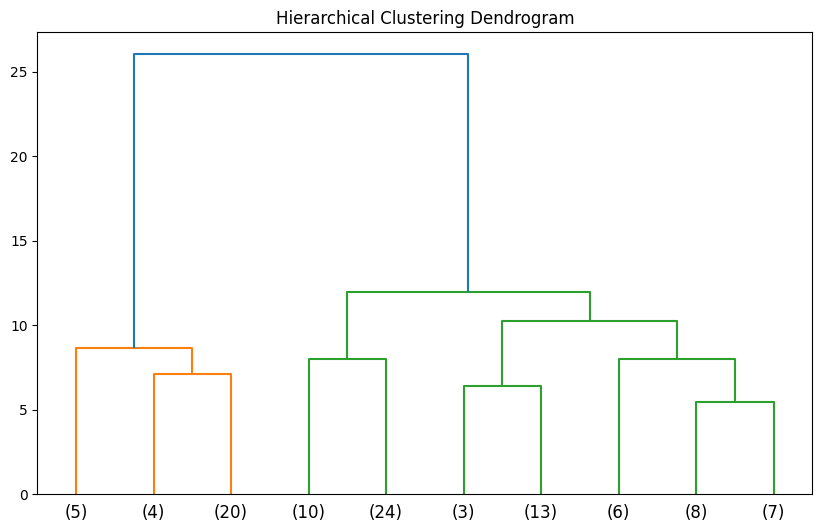

In [48]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

linked = linkage(X_scaled, method="ward")

plt.figure(figsize=(10, 6))
dendrogram(linked, truncate_mode="lastp", p=10)
plt.title("Hierarchical Clustering Dendrogram")
plt.show()

Hasil clustering menggunakan Agglomerative Clustering menunjukkan pola segmentasi yang konsisten dengan K-Means, terutama dalam membedakan pengguna berorientasi belanja bernilai tinggi, pengguna dengan transaksi rutin kebutuhan, dan pengguna dengan tingkat aktivitas tinggi. Konsistensi ini mengindikasikan bahwa struktur cluster yang terbentuk bersifat robust dan mencerminkan perilaku transaksi pengguna secara alami.

In [50]:
features = [
    "total_spent",
    "avg_spent",
    "tx_count",
    "avg_items",
    "bills_ratio",
    "service_ratio",
    "shopping_ratio",
    "evening_ratio"
]

In [51]:
cluster_mean = persona_features.groupby("cluster_hier")[features].mean()
overall_mean = persona_features[features].mean()

cluster_lift = cluster_mean / overall_mean
cluster_lift

,total_spent,avg_spent,tx_count,avg_items,bills_ratio,service_ratio,shopping_ratio,evening_ratio
cluster_hier,,,,,,,,
0,0.753096,0.828777,0.918676,0.936157,1.178971,1.184846,0.929349,0.986360
1,1.163145,1.146765,1.020345,1.103708,0.706746,0.689763,1.116986,1.013747
2,1.129537,1.061149,1.071147,0.981019,1.055366,1.063457,0.977102,1.003118


In [52]:
persona_features["persona_label"] = persona_features["cluster_hier"].map({
    0: "Low Activity, Bill-Oriented User",
    1: "High Spending, Shopping-Oriented User",
    2: "High Activity, Balanced User"
})

In [53]:
persona_features["persona_label"].value_counts(normalize=True) * 100

,proportion
persona_label,
"Low Activity, Bill-Oriented User",37.0
"High Activity, Balanced User",34.0
"High Spending, Shopping-Oriented User",29.0


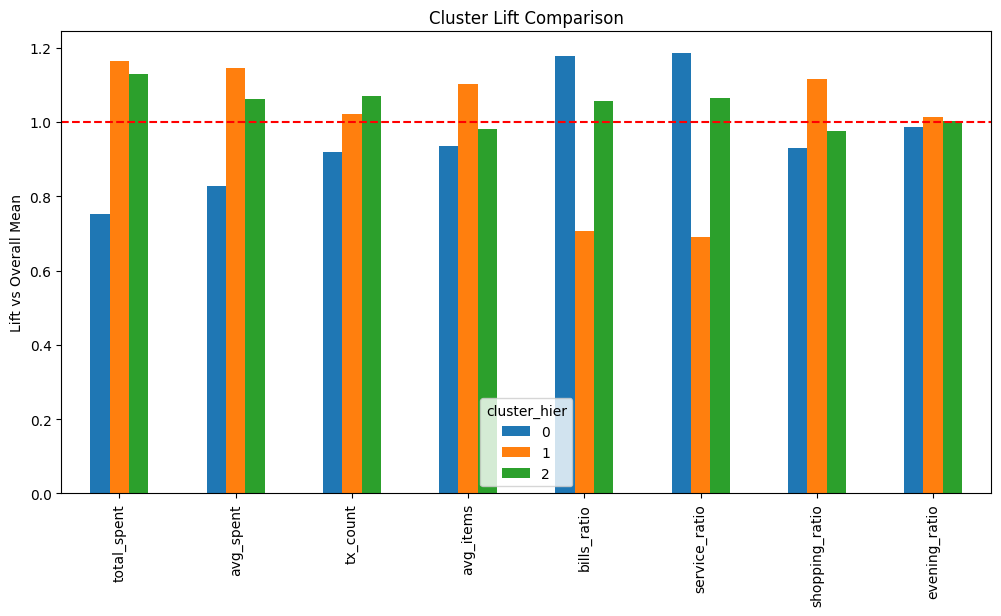

In [54]:
cluster_lift.T.plot(kind="bar", figsize=(12,6))
plt.axhline(1, color="red", linestyle="--")
plt.title("Cluster Lift Comparison")
plt.ylabel("Lift vs Overall Mean")
plt.show()